In [1]:
import numpy as np 
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
data = pd.read_csv("dataset.csv")

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
columns = ['Glucose','BloodPressure','SkinThickness',"Insulin","BMI"]

for column in columns:
    data[column] = data[column].replace(0,np.NaN)
    mean = int(data[column].mean(skipna=True))
    data[column]  =data[column].replace(np.NaN,mean)
    print(data[column])

0      148.0
1       85.0
2      183.0
3       89.0
4      137.0
       ...  
763    101.0
764    122.0
765    121.0
766    126.0
767     93.0
Name: Glucose, Length: 768, dtype: float64
0      72.0
1      66.0
2      64.0
3      66.0
4      40.0
       ... 
763    76.0
764    70.0
765    72.0
766    60.0
767    70.0
Name: BloodPressure, Length: 768, dtype: float64
0      35.0
1      29.0
2      29.0
3      23.0
4      35.0
       ... 
763    48.0
764    27.0
765    23.0
766    29.0
767    31.0
Name: SkinThickness, Length: 768, dtype: float64
0      155.0
1      155.0
2      155.0
3       94.0
4      168.0
       ...  
763    180.0
764    155.0
765    112.0
766    155.0
767    155.0
Name: Insulin, Length: 768, dtype: float64
0      33.6
1      26.6
2      23.3
3      28.1
4      43.1
       ... 
763    32.9
764    36.8
765    26.2
766    30.1
767    30.4
Name: BMI, Length: 768, dtype: float64


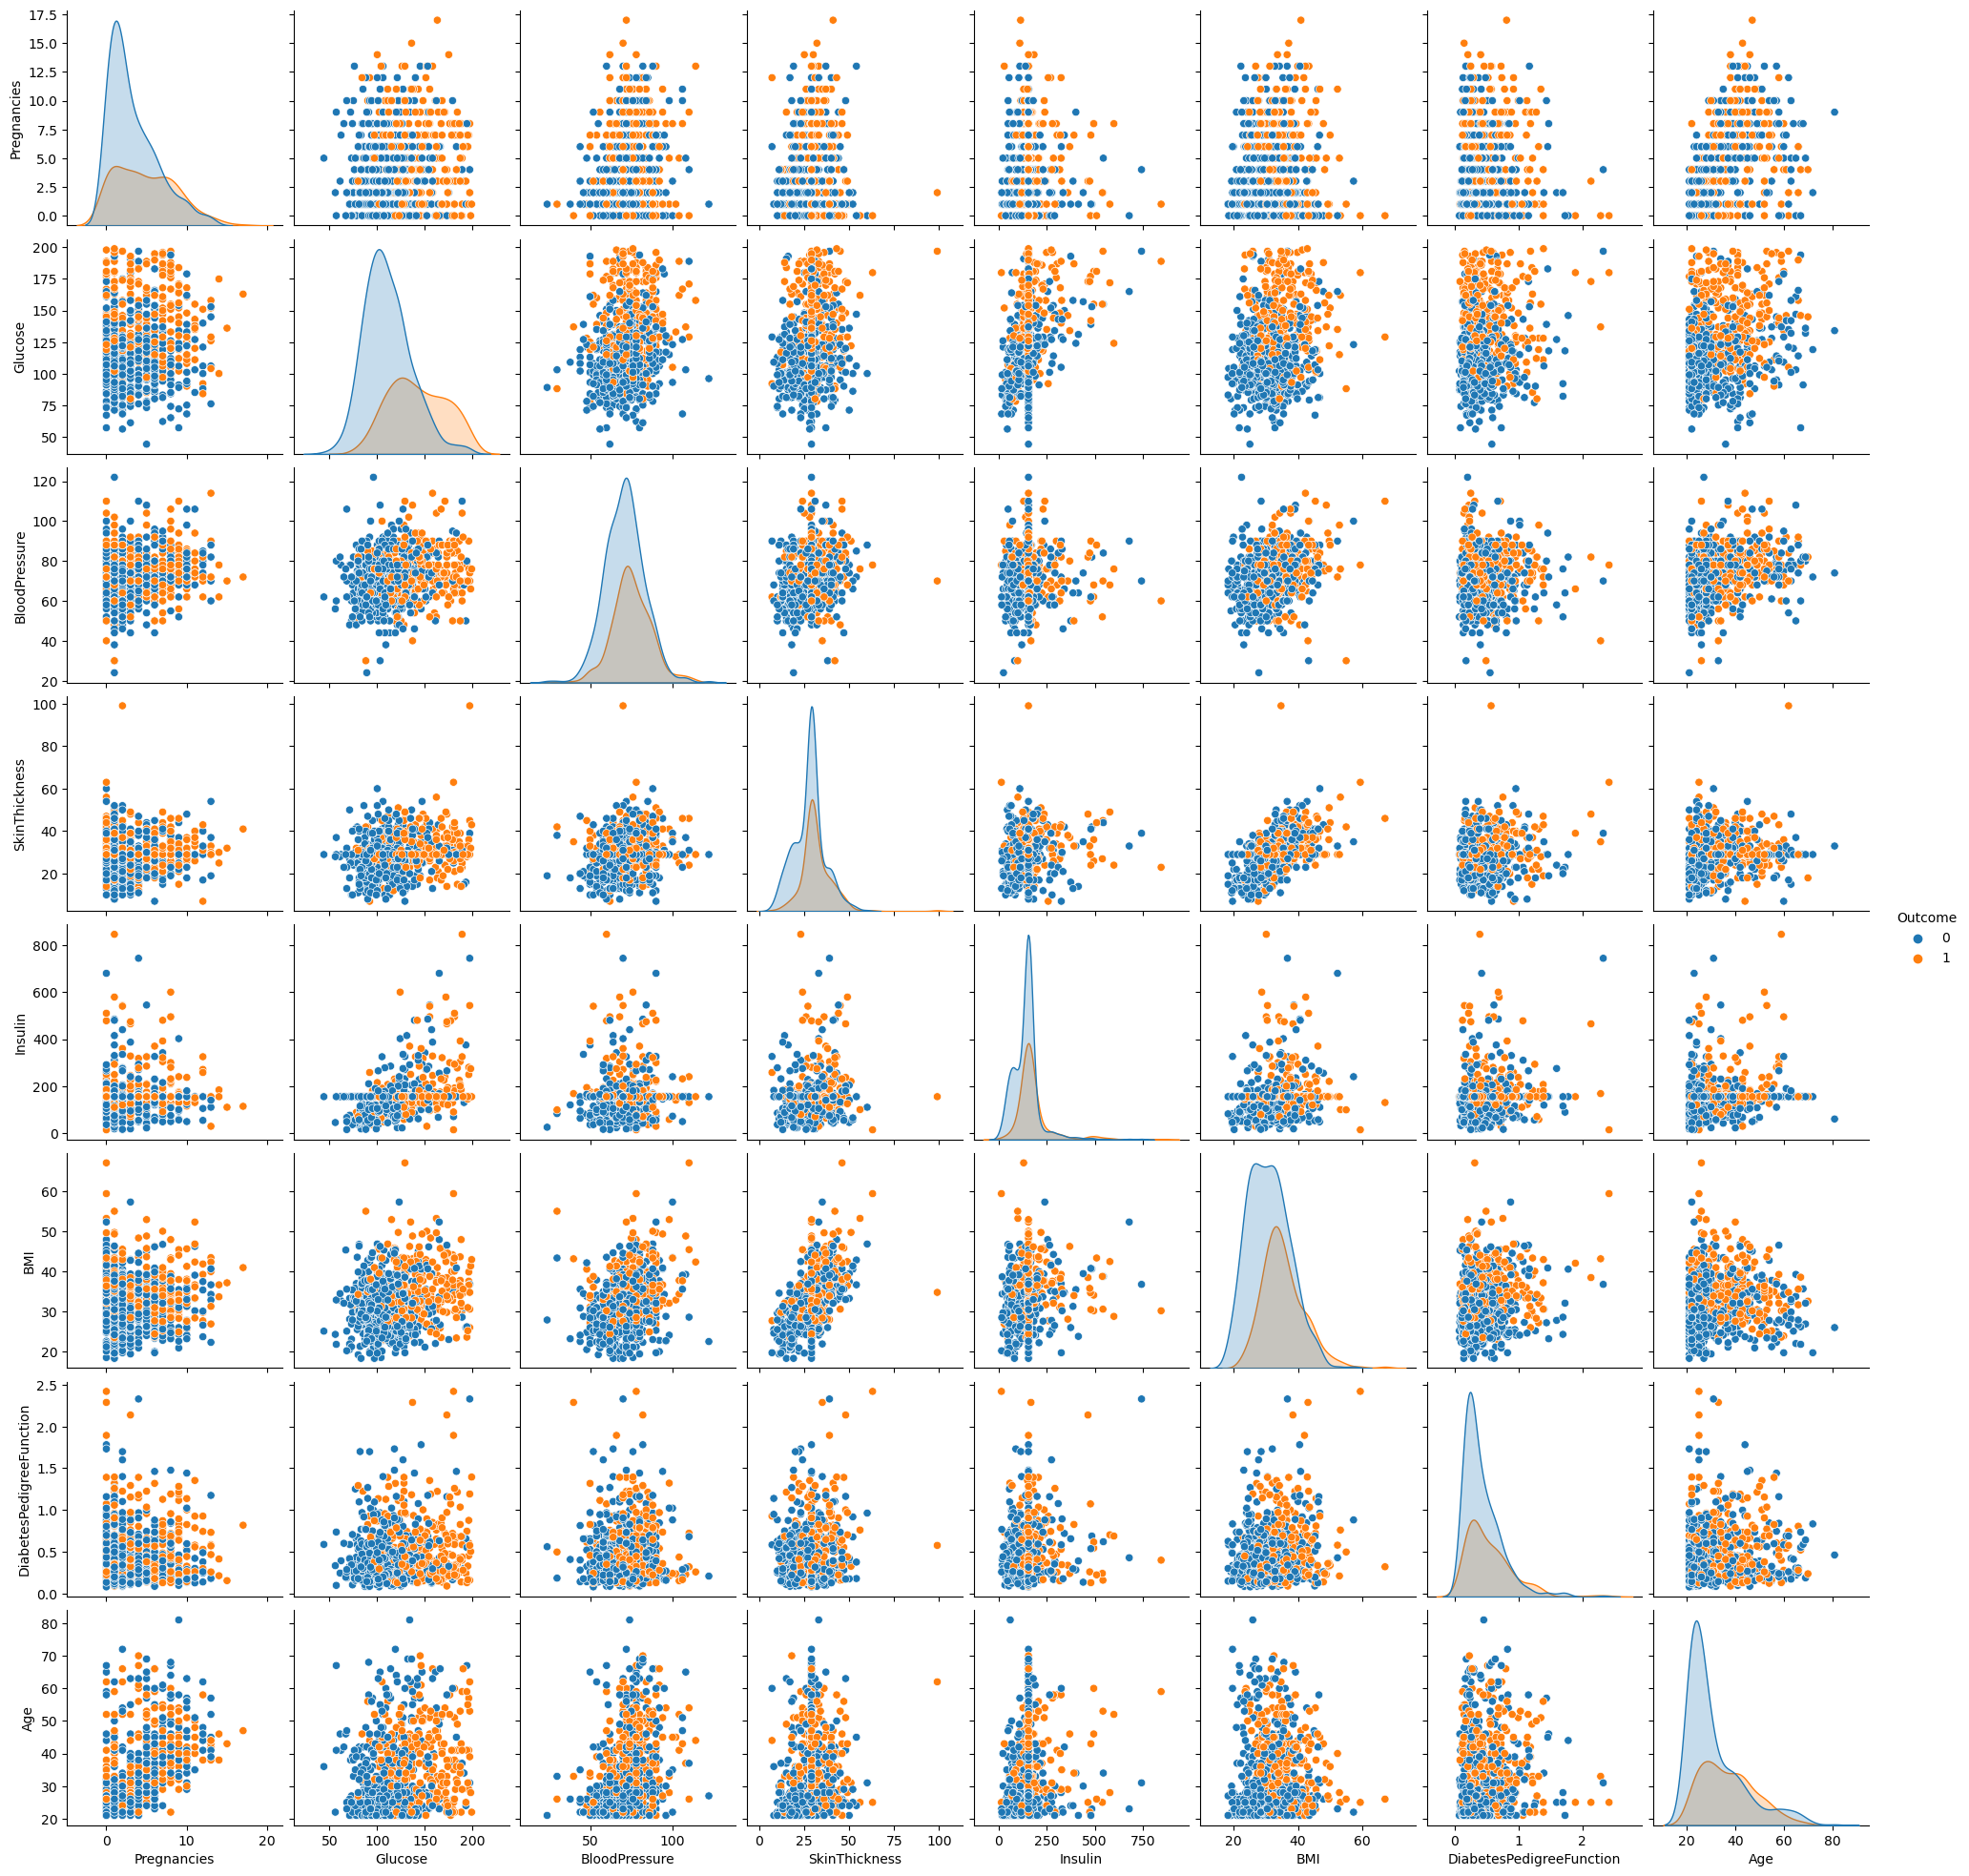

In [7]:
p=sns.pairplot(data,hue='Outcome')

In [109]:
k = int(np.sqrt(data['Outcome'].shape[0]))

In [110]:
X = data.iloc[:,0:-1].values
y = data.iloc[:,-1].values

In [111]:
from sklearn.model_selection import train_test_split

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [113]:
from sklearn.preprocessing import StandardScaler

In [114]:
scaler = StandardScaler()

In [115]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [116]:
from sklearn.neighbors import KNeighborsClassifier

In [117]:
clf = KNeighborsClassifier(n_neighbors=k)

In [118]:
clf.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=27)

In [119]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix

In [120]:
y_pred = clf.predict(X_test_scaled)

C:\Users\reliance\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [121]:
confusion_matrix(y_test,y_pred)

array([[93,  6],
       [26, 29]], dtype=int64)

In [122]:
accuracy_score(y_test,y_pred)

0.7922077922077922

In [123]:
# using random forest

In [124]:
# base estimator
from sklearn.neighbors import KNeighborsClassifier

In [125]:
from sklearn.ensemble import BaggingClassifier

In [127]:
clf1 = BaggingClassifier(base_estimator=KNeighborsClassifier(),
                         n_estimators=500,
                         max_samples=0.50,
                        bootstrap=True,
                         random_state=1
                        )

In [128]:
clf1.fit(X_train_scaled,y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(), max_samples=0.5,
                  n_estimators=500, random_state=1)

In [129]:
y_pred1 = clf1.predict(X_test_scaled)

In [130]:
confusion_matrix(y_test,y_pred1)

array([[87, 12],
       [20, 35]], dtype=int64)

In [131]:
accuracy_score(y_test,y_pred)

0.7922077922077922